<a href="https://colab.research.google.com/github/learn-python-and-r/IST-652/blob/master/Units_8_%26_9_Twitter_Data_Collection_and_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Natural Language Processing

### Topic outline

- Collecting text data from Twitter.

- Text processing basics:
  - Tokenization.
  - Text formatting and cleaning

### Packages discussed

- twitter
- nltk
- flair


# Collecting text data from Twitter.
- signing up for a developer account.
- authentication
- searching and extracting text data from the Twitter API.

## Signing up for a developer account

https://developer.twitter.com/en

- Once you sign up for this account you can get the authentication credentials you need.

- **PRO TIP** ONLY FILL OUT THE REQUIRED INFO. ANY ADDITIONAL INFO THAT YOU FILL OUT MAY DELAY YOUR ABILITY TO CONNECT! 

## Authentication

- pass your credentials to Twitter to gain access to their data stream.

- first have to install the *tweepy* package.

- tweepy is an extensively documented package that is used to extract tweets: https://www.tweepy.org/ 

In [ ]:
# Install twitter package
!pip install tweepy
!pip install nltk

- next we enter our credentials that we retreive from our developer account

In [ ]:
import tweepy

CONSUMER_KEY = 'dQHZWzGd1OoHsD271rpBxCN3r' #API Key
CONSUMER_SECRET = 'GCvSSxYCLjucFK51dQwbardMOaE56SCbhlwDrSYc1KmcBqWmfw' # API secret Key
OAUTH_TOKEN = 'AAAAAAAAAAAAAAAAAAAAAEkgHAEAAAAA0bgSaIuKsrFvrOkMJ8PZK57XKRY%3DAKsLHOFMzwfA2tujYGx7etREr0vxbiGVsOrgM1QwagRUGy8g9t' # Access Token
OAUTH_SECRET = 'kv9AM05cHjdaB8NipSNb7w1U6IpbmWPE7UlAepdwrYKQV' # Access Token Secret

 # Authorization to consumer key and consumer secret 
auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET) 
  
# Access to user's access key and access secret 
auth.set_access_token(OAUTH_TOKEN, OAUTH_SECRET) 
  
# Calling api 
api = tweepy.API(auth) 

api

In [ ]:
def appauth_login(): 
  auth = tweepy.AppAuthHandler(CONSUMER_KEY,CONSUMER_SECRET)
   tweepy_api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True) 
  return tweepy_api
   api = appauth_login()

## Searching and extracting text data from the Twitter API.

- We are going to extract tweet information from a single user but there are MANY other things that you can do with tweepy

- Check out the documentation here: http://docs.tweepy.org/en/v3.5.0/api.html#tweepy-api-twitter-api-wrapper

- Here we collect tweets using the 'user_timeline' function.

In [ ]:
# Collect tweet info from a single user
tweets = api.user_timeline(screen_name='@nytimes',
                           tweet_mode='extended') # extended mode allows for extraction of the full text of tweets
len(tweets) 
tweets[0]

TweepError: ignored

The tweet "objects" contain 20 tweets along with associated metadata.

In [ ]:
tweets[0]._json

{'contributors': None,
 'coordinates': None,
 'created_at': 'Fri Jun 12 17:20:04 +0000 2020',
 'display_text_range': [0, 211],
 'entities': {'hashtags': [],
  'symbols': [],
  'urls': [{'display_url': 'nyti.ms/3cVOzCU',
    'expanded_url': 'https://nyti.ms/3cVOzCU',
    'indices': [188, 211],
    'url': 'https://t.co/OvdqWAFwml'}],
  'user_mentions': []},
 'favorite_count': 302,
 'favorited': False,
 'full_text': 'Many football players say the NFL must recognize Colin Kaepernick if the league wants its newfound progressive stance to be viewed as legitimate: "This was the one guy who did something."\nhttps://t.co/OvdqWAFwml',
 'geo': None,
 'id': 1271492478408052736,
 'id_str': '1271492478408052736',
 'in_reply_to_screen_name': None,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'is_quote_status': False,
 'lang': 'en',
 'place': None,
 'possibly_sensitive': False,
 'retweet_count': 67,
 'retweeted': F

-  What info can we get from these tweet objects?

In [ ]:
# First let's extract the JSON info
nyt_tweets_clean = [x._json for x in tweets]


In [ ]:
nyt_tweets_clean[0]

{'contributors': None,
 'coordinates': None,
 'created_at': 'Fri Jun 12 17:20:04 +0000 2020',
 'display_text_range': [0, 211],
 'entities': {'hashtags': [],
  'symbols': [],
  'urls': [{'display_url': 'nyti.ms/3cVOzCU',
    'expanded_url': 'https://nyti.ms/3cVOzCU',
    'indices': [188, 211],
    'url': 'https://t.co/OvdqWAFwml'}],
  'user_mentions': []},
 'favorite_count': 302,
 'favorited': False,
 'full_text': 'Many football players say the NFL must recognize Colin Kaepernick if the league wants its newfound progressive stance to be viewed as legitimate: "This was the one guy who did something."\nhttps://t.co/OvdqWAFwml',
 'geo': None,
 'id': 1271492478408052736,
 'id_str': '1271492478408052736',
 'in_reply_to_screen_name': None,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'is_quote_status': False,
 'lang': 'en',
 'place': None,
 'possibly_sensitive': False,
 'retweet_count': 67,
 'retweeted': F

- let's extract the text only

In [ ]:
tweettext = [x['full_text'] for x in nyt_tweets_clean]

 - These tweets are ugly and have too many characters and other garbage. We need to clean them.

In [ ]:
# These tweets are ugly and have too many characters and other garbage
tweettext[0:10]

The tweet-preprocessor package allows you to clean junk from tweets like links, hashtags etc which prevent your ability to perform text analysis.

- Documentation here: https://pypi.org/project/tweet-preprocessor/

In [ ]:
!pip install tweet-preprocessor

These functions need to be imported in these ways to avoid errors.

In [ ]:
from preprocessor.api import clean, tokenize, parse
# Clean the tweet text using pre processor
tweettext_clean = [clean(x) for x in tweettext]

In [ ]:
# This looks better
tweettext_clean[0:10]

['Many football players say the NFL must recognize Colin Kaepernick if the league wants its newfound progressive stance to be viewed as legitimate: "This was the one guy who did something."',
 'In Opinion is talking about his column, Black Lives Matter Is Winning',
 'An interview with Bob Dylan on mortality, history and his new album',
 'As African-American populations have expanded in American cities, so have police departments, a number of studies have found by spending and force size.',
 'Critics Notebook: Architects should not contribute their expertise to the most egregious aspects of a system that commits exceptional violence against African-Americans and other minorities, writes',
 'Video of a police officer punching a First Nations leader, Allan Adam, and putting him in a chokehold has shocked many Canadians. Adam was being questioned about an expired license plate and ended up charged with assaulting an officer and resisting arrest.',
 'This question about whether technology s

# [**Exercise 4.1**] Tweet Extraction (5 minutes)

Find a twitter username and save the text of 20 tweets in a list called 'recent_tweets'.

In [ ]:
## Code here ##
CNNtweets = api.user_timeline(screen_name='@CNN',
                           tweet_mode='extended') # This will get you the full metadata from the @CNN timeline.


# This will get the JSON tweet metadata
CNNcleantweets  = [x._json for x in CNNtweets]

# Get the text of the tweets only and save to a list called 'recent tweets'
recent_tweets = [x['full_text'] for x in CNNcleantweets]


# NLTK Text processing Basics:

- Tokenization.
- Text formatting and cleaning.
- Documention can be found here: https://www.nltk.org/

In [ ]:
!pip install nltk

In [ ]:
tweettext_clean[0]

'Many football players say the NFL must recognize Colin Kaepernick if the league wants its newfound progressive stance to be viewed as legitimate: "This was the one guy who did something."'

We need to download the 'punkt' package to begin tokenization in NLTK

In [9]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

## Tokenization

-  the first thing we need to do to begin processing these tweets is to tokenize them, or split them in some way.

- the can be done by sentence or n-gram where n is the number of word-phrases that the tokenizer extracts

In [ ]:
# This is the second semi-cleaned tweet
tweettext_clean[5]

'Video of a police officer punching a First Nations leader, Allan Adam, and putting him in a chokehold has shocked many Canadians. Adam was being questioned about an expired license plate and ended up charged with assaulting an officer and resisting arrest.'

In [3]:
#Example 

tweettext_clean = ['Kool-Aid Mans crashing through to bring double the fun vs. soda!', 'Trending with: #RollTide, Coach Saban.']

### Punctuation removal

Let's first remove all punctuation and set all of the text to lower case using the *string* package along with the 'translate()' function



In [4]:
import string 
tweettext_clean = [x.translate(str.maketrans('', '', string.punctuation)) for x in tweettext_clean]
tweettext_clean

['KoolAid Mans crashing through to bring double the fun vs soda',
 'Trending with RollTide Coach Saban']

# Clean our tokenized sentences

In [14]:
# Remove punctuation
tweettext_clean = [x.translate(str.maketrans('', '', string.punctuation)) for x in tweettext_clean]
tweettext_clean

['koolaid mans crashing through to bring double the fun vs soda',
 'trending with rolltide coach saban']

### Transforming to lower case

let's set everything to lowercase as well with the .lower() function


In [5]:
tweettext_clean = [x.lower() for x in tweettext_clean]
tweettext_clean

['koolaid mans crashing through to bring double the fun vs soda',
 'trending with rolltide coach saban']

### Sentence Tokenization

We can split tweets up by sentence, which is useful for sentiment analysis.

In [10]:
# Sentence tokenization

originaltweet = 'Registration for our first virtual #OrangeCentral —our celebration of all thingsTangerine— is LIVE! Alumni around the Earth globe americas can reconnect with classmates, explore SyracuseUs newest places and programs, learn about the campus community and more, Oct. 29-Nov. 1.'

from nltk.tokenize import sent_tokenize

tokenized_tweet_sent=sent_tokenize(originaltweet)
print(tokenized_tweet_sent)

['Registration for our first virtual #OrangeCentral —our celebration of all thingsTangerine— is LIVE!', 'Alumni around the Earth globe americas can reconnect with classmates, explore SyracuseUs newest places and programs, learn about the campus community and more, Oct. 29-Nov. 1.']


In [11]:
tokenized_tweet_sent[0]

'Registration for our first virtual #OrangeCentral —our celebration of all thingsTangerine— is LIVE!'

In [12]:
tokenized_tweet_sent[1]

'Alumni around the Earth globe americas can reconnect with classmates, explore SyracuseUs newest places and programs, learn about the campus community and more, Oct. 29-Nov. 1.'

In [15]:
# Punctuation removed
tokenized_tweet_sent = [x.translate(str.maketrans('', '', string.punctuation)) for x in tokenized_tweet_sent]
tokenized_tweet_sent

['Registration for our first virtual OrangeCentral —our celebration of all thingsTangerine— is LIVE',
 'Alumni around the Earth globe americas can reconnect with classmates explore SyracuseUs newest places and programs learn about the campus community and more Oct 29Nov 1']

In [16]:
# Transform into lowercase
tokenized_tweet_sent = [x.lower() for x in tokenized_tweet_sent]
tokenized_tweet_sent

['registration for our first virtual orangecentral —our celebration of all thingstangerine— is live',
 'alumni around the earth globe americas can reconnect with classmates explore syracuseus newest places and programs learn about the campus community and more oct 29nov 1']

### Unigrams

...or we can do tokenization by words or 'unigrams'

- text can also be split into n-grams or n length word-phrases.

In [17]:
# 1-gram (word) tokenization

from nltk.tokenize import word_tokenize

tokenized_tweet_word=word_tokenize(tokenized_tweet_sent[0])
print(tokenized_tweet_word)

len(tokenized_tweet_word)

['registration', 'for', 'our', 'first', 'virtual', 'orangecentral', '—our', 'celebration', 'of', 'all', 'thingstangerine—', 'is', 'live']


13

# [**Exercise 4.2**] Standardizing and Tokenizing Tweets (7 minutes)


- Preprocess tweets in the 'recent_tweets' list you created from Exercise 4.1 with the 'clean()' function.

- Remove punctuation and set to lower case  each tweet in the 'recent_tweets' list that you created from Exercise 4.1.

- Create a list called "tokenized_tweets" which contains a sentence tokenized version of every tweet that you collected in the 'recent_tweets' list.

Print out the first 3 tweets

In [ ]:
# Code here
from preprocessor.api import clean, tokenize, parse
import string
from nltk.tokenize import sent_tokenize




# Sentiment Analysis

- Sentiment analysis uses supervised machine learning to "read" texts and make predictions about the sentiment of a text.

- Here we will use a pre-trained sentiment analysis algorithm that uses neural netwoks to predict the sentiment of the @nytimes tweets.

- This is found in the 'flair' package whic you can learn more about here: https://towardsdatascience.com/text-classification-with-state-of-the-art-nlp-library-flair-b541d7add21f

- Below is an example of the sentiment that is predicted by a sentiment analysis algorithm



![alt text](https://ai2-s2-public.s3.amazonaws.com/figures/2017-08-08/0cc39c70021d21fc0d2fd7a986ccd242bef86c29/6-Figure1-1.png)

## Package installation

Let's first install flair:



In [ ]:
!pip3 install flair
import flair
flair_sentiment = flair.models.TextClassifier.load('en-sentiment')

## Estimating the sentiment of sentences/tweets

Once we have done this, it is easy to do sentiment analysis of any cleaned sentence

Let's check out our first cleaned tweet:

In [ ]:
tweettext_clean[0]

'many football players say the nfl must recognize colin kaepernick if the league wants its newfound progressive stance to be viewed as legitimate this was the one guy who did something'

In [ ]:
s = flair.data.Sentence(tweettext_clean[0]) # This processes the sentence for flair
flair_sentiment.predict(s) # This makes a prediction using the sentence
total_sentiment = s.labels # This extracts the sentiment label
total_sentiment

[NEGATIVE (0.7213)]

Let's apply this to all the tweets and visualize it. 

- We first create a function to do this

In [ ]:
import pandas as pd
import seaborn as sns

sns.set(rc={'figure.figsize':(30,1)})

def visualise_sentiments(data):
  sns.heatmap(pd.DataFrame(data).set_index("Sentence").T,center=0, annot=True, cmap = "PiYG")

In [ ]:
ss = [flair.data.Sentence(s) for s in tweettext_clean]
[flair_sentiment.predict(s) for s in ss]
ss

[Sentence: "many football players say the nfl must recognize colin kaepernick if the league wants its newfound progressive stance to be viewed as legitimate this was the one guy who did something"   [− Tokens: 31  − Sentence-Labels: {'class': [NEGATIVE (0.7213)]}],
 Sentence: "in opinion is talking about his column black lives matter is winning"   [− Tokens: 12  − Sentence-Labels: {'class': [POSITIVE (0.9527)]}],
 Sentence: "an interview with bob dylan on mortality history and his new album"   [− Tokens: 12  − Sentence-Labels: {'class': [POSITIVE (0.9957)]}],
 Sentence: "as africanamerican populations have expanded in american cities so have police departments a number of studies have found by spending and force size"   [− Tokens: 23  − Sentence-Labels: {'class': [POSITIVE (0.9724)]}],
 Sentence: "critics notebook architects should not contribute their expertise to the most egregious aspects of a system that commits exceptional violence against africanamericans and other minorities wri

And then apply this function to our tweets....

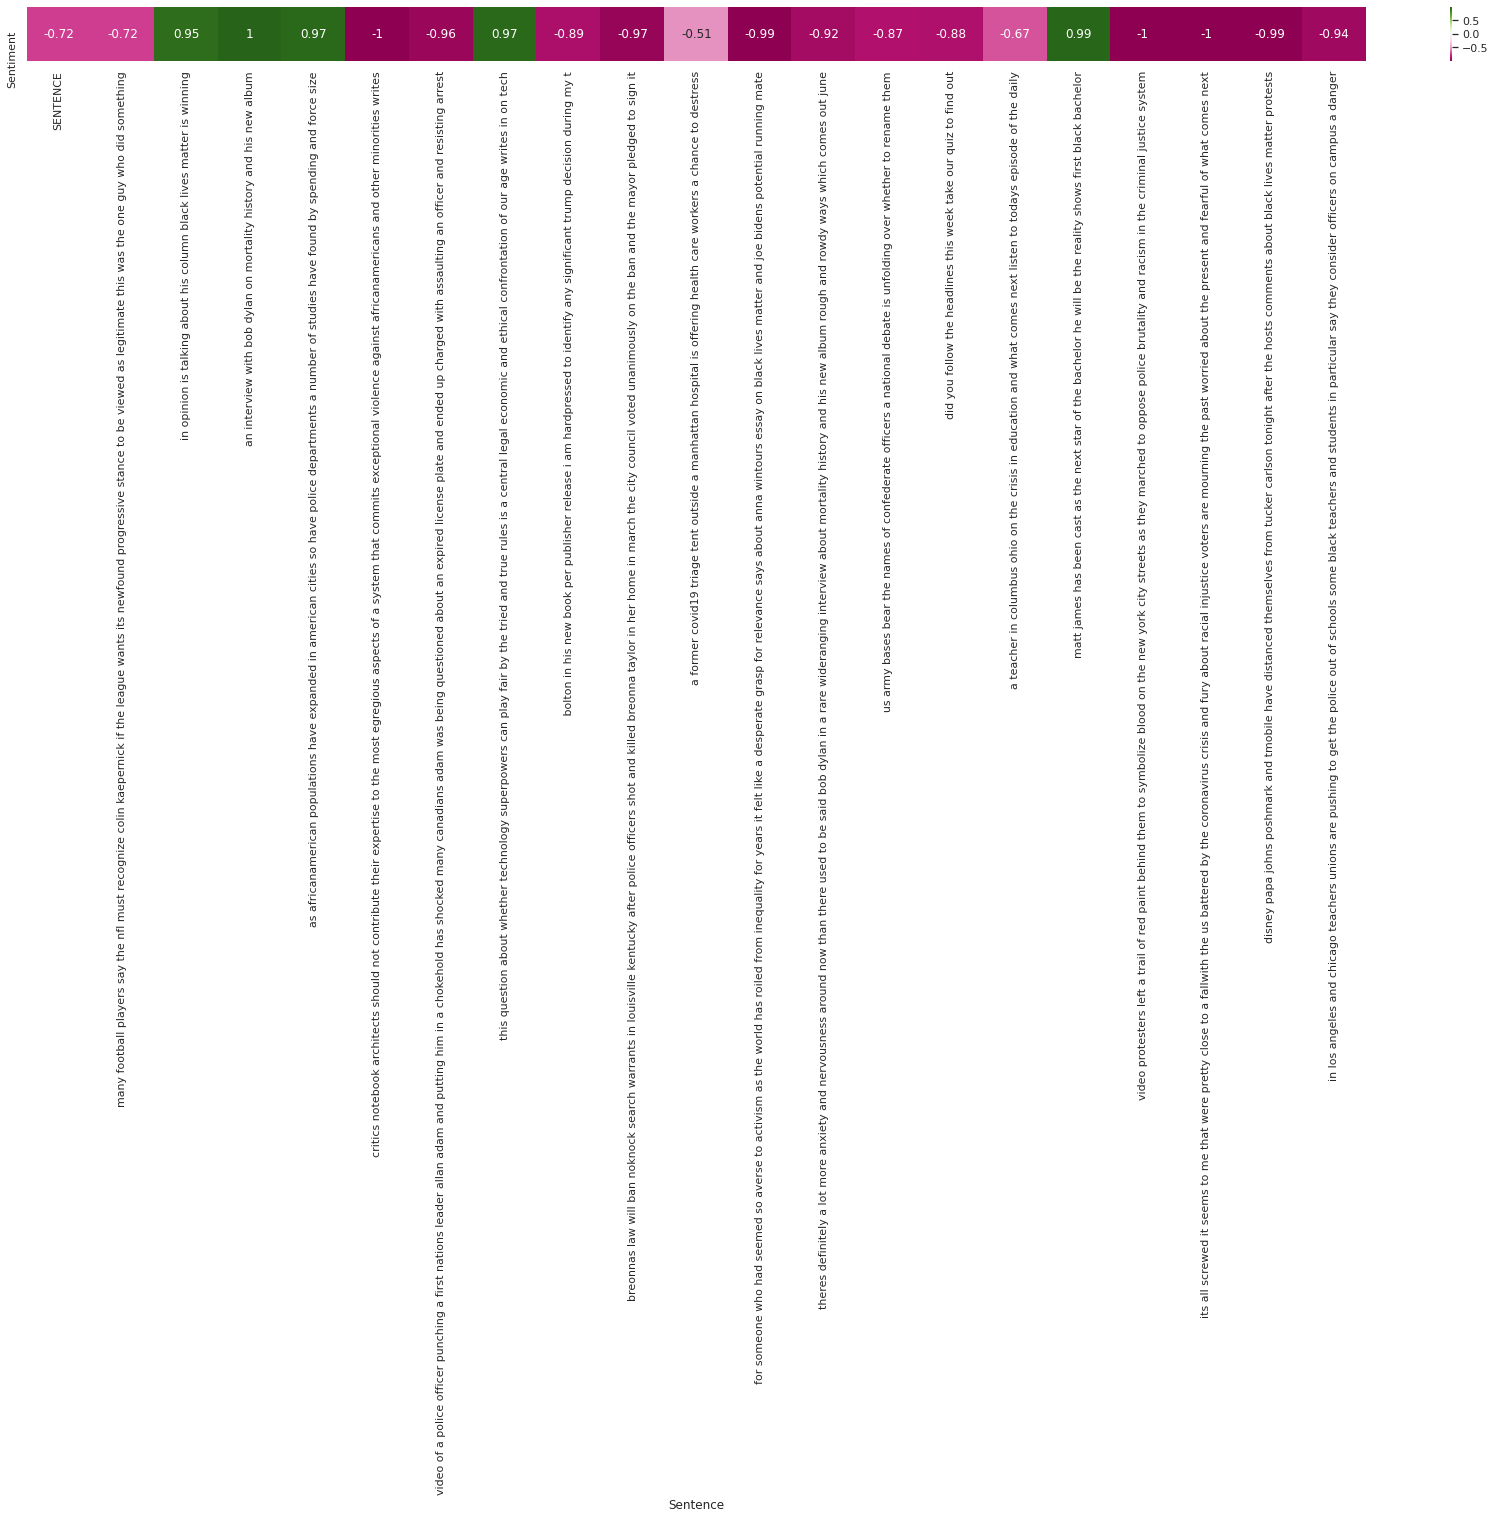

In [ ]:
ss = [flair.data.Sentence(s) for s in tweettext_clean]
[flair_sentiment.predict(s) for s in ss]

sentiments = [s.labels[0].score * (-1,1)[str(s.labels[0]).split()[0].startswith("POS")] for s in ss]

visualise_sentiments({
      "Sentence":["SENTENCE"] + tweettext_clean,
      "Sentiment":[total_sentiment[0].score *(-1,1)[str(total_sentiment[0]).split()[0].startswith("POS")]] + sentiments,
})

In [ ]:
sentiments

[-0.7213073372840881,
 0.9526512622833252,
 0.9956533908843994,
 0.9724420309066772,
 -0.9998093247413635,
 -0.9558181762695312,
 0.9688155055046082,
 -0.8903951644897461,
 -0.965428352355957,
 -0.5089871883392334,
 -0.994331955909729,
 -0.9160745143890381,
 -0.8699300289154053,
 -0.8790299296379089,
 -0.6747273206710815,
 0.9862040281295776,
 -0.9979733824729919,
 -0.9991437196731567,
 -0.9926026463508606,
 -0.9372504353523254]

# +++++++++++++++++++++++++++++++++++++++++

# END LESSON: Extra Content Below

# +++++++++++++++++++++++++++++++++++++++++

# Text Analytics: Frequency Distributions

- Tokenization is the first step toward doing more advanced text analysis, but you can also use it to do some basic statistics like a frequency distribution.



In [ ]:
# Turns a list into a string

def listToString(s):  
    
    # initialize an empty string 
    str1 = " " 
    
    # return string   
    return (str1.join(s)) 

In [ ]:
# Let's combine all the tweets into a giant string and calculate the word frequencies
tweet_string = listToString(tweettext_clean2)

- tokenize the tweets

In [ ]:
from nltk.tokenize import word_tokenize
tokenized_tweet_word=word_tokenize(tweet_string)
len(tokenized_tweet_word)

640

In [ ]:
from nltk.probability import FreqDist
tweet_frequencies = FreqDist(tokenized_tweet_word)
print(tweet_frequencies)

<FreqDist with 185 samples and 640 outcomes>


## Common words
- what are the most common words?

In [ ]:
tweet_frequencies.most_common(10)

[('to', 36),
 ('.', 32),
 ('the', 22),
 ('in', 16),
 ('and', 14),
 ('is', 14),
 ('of', 12),
 (',', 12),
 ('$', 12),
 ('twitter', 10)]

## Stop word removal

- these are words we generally find in all sentences called "stop words" so let's remove these first and then recalculate

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
stop_words=set(stopwords.words("english"))
print(stop_words)

{'wouldn', 'be', 'whom', 'below', 'ma', 'up', 'had', 'your', 'do', 'having', 'can', 'am', 'both', 'here', 'theirs', 'their', "doesn't", 'ain', 'mustn', 'me', "won't", 'has', 'yourselves', 's', 'of', 'it', 'for', 'and', "you'd", 'not', 'weren', 'from', 'until', 'any', 'we', 'him', 'did', 'down', 'just', 'or', "weren't", 'there', 'at', 'wasn', 'ourselves', 're', 'again', 'in', "didn't", 'while', 'each', 'when', "you're", "haven't", 'i', "you'll", "mightn't", 'didn', 'shan', 'above', 'nor', 'my', 'was', 'now', "she's", 'during', 'herself', 'through', 'off', 'his', 'own', 'on', 'she', 'very', "don't", 'over', 'after', 'ours', 'you', 'hasn', 'only', 'that', 'further', 'same', "should've", 'what', 'hadn', 'our', 'does', 'they', 'have', 'no', 'yours', 'about', 'more', "couldn't", 'couldn', 'some', 'is', 'such', "isn't", "wouldn't", 'before', 'by', 'which', 'where', 'm', 'himself', 'been', 'between', 'won', 'out', 't', 'these', 'those', 'because', 'don', 'll', "shan't", 'against', 'needn', 'a'

In [ ]:
tokenized_tweet_word_clean = []

# Remove additional 'stop' words by creating a list of words to remove
terms_to_remove=['twitter']

for word in tokenized_tweet_word:
  if (word not in stop_words) and (word not in terms_to_remove) and len(word)>2:
    tokenized_tweet_word_clean.append(word)

tokenized_tweet_word_clean

In [ ]:
# Remove additional 'stop' words by adding to the list of stop words
stop_words.add('twitter')

tokenized_tweet_word_clean = []

for word in tokenized_tweet_word:
  if (word not in stop_words) and len(word)>2:
    tokenized_tweet_word_clean.append(word)

tokenized_tweet_word_clean

- let's run the frequency distribution again

In [ ]:
from nltk.probability import FreqDist
tweet_frequencies_clean = FreqDist(tokenized_tweet_word_clean)

tweet_frequencies_clean.most_common(10)

[('bus', 6),
 ('transit', 6),
 ('connect', 6),
 ('minneapolis', 4),
 ('george', 4),
 ('floyd', 4),
 ('protesting', 4),
 ('memory', 4),
 ('china', 4),
 ('lies', 4)]

## Frequency distribution plot

- Let's plot the frequencies

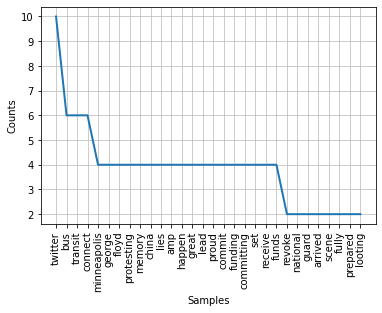

In [ ]:
import matplotlib.pyplot as plt
tweet_frequencies_clean.plot(30,cumulative=False)

# Save the plot
plt.savefig('plotname.png')